#### Simulations used a tau of 4, max pop size fold change of 3, 2e4 time steps

In [1]:
library(naturalsort)
library(fields)
library(rasterImage)
library(pracma) # only needed for moving-average plot
n=256
cols = rainbow(n, s = 1, v = 1, start = 0.7, end = 0, alpha = 1)

Loading required package: spam
Loading required package: dotCall64
Loading required package: grid
Spam version 2.2-0 (2018-06-19) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: ‘spam’

The following objects are masked from ‘package:base’:

    backsolve, forwardsolve

Loading required package: maps
See www.image.ucar.edu/~nychka/Fields for
 a vignette and other supplements. 
Loading required package: plotrix

Attaching package: ‘plotrix’

The following object is masked from ‘package:fields’:

    color.scale



## Population size time series

In [2]:
flst <- naturalsort(list.files('~/jackgl/test_brain_genetrack/'))
res <- array(0,dim=c(5,5))

In [110]:
dataDir <- '~/jackgl/test_brain_genetrack/'
Ns <- array(NA,dim=c(20,2e4))
j <- 1
for (i in 1:20) {
    load(paste0(dataDir,flst[i]))
    N[N==0] <- NA
    Ns[j,] <- N
    j <- j+1
}

In [111]:
Nstmp <- array(NA,dim=c(4,2e4))
for (i in 1:4) {
    Nstmp[i,] <- apply(Ns[(5*(i-1)+1):(5*i),],2,mean)
}
Ns <- Nstmp

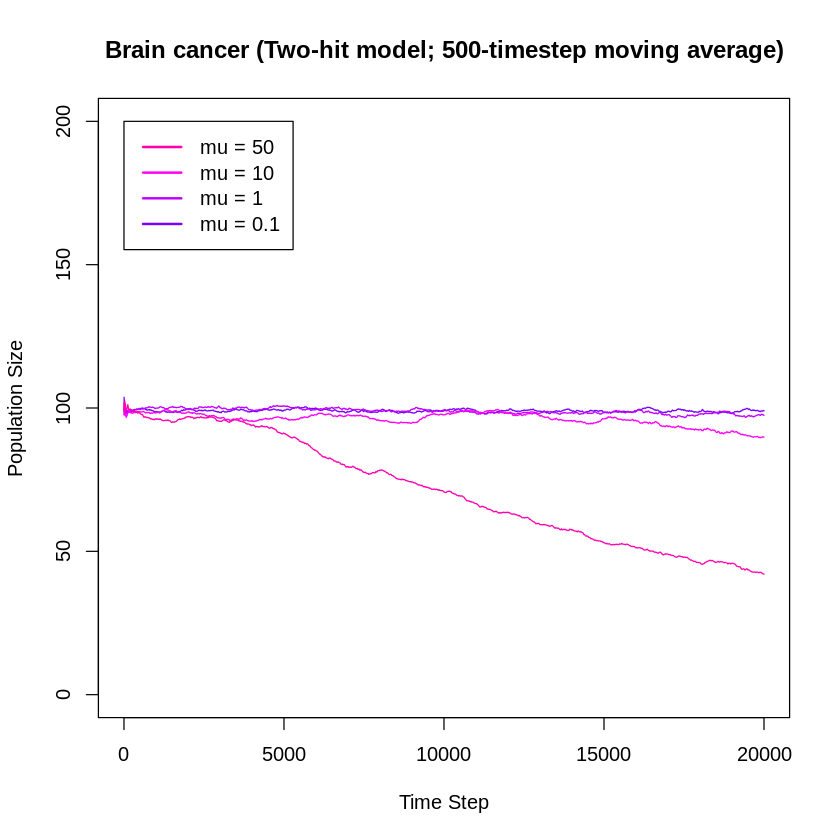

In [112]:
# plot(1:length(Ns[[1]]),Ns[[1]],type='l',xlab='Timestep',ylab='Population Size',ylim=c(0,200),col=cols[1*40])
# for (i in 2:5) {lines(1:length(Ns[[i]]),Ns[[i]],type='l',xlab='Timestep',ylab='Population Size',ylim=c(0,200),col=cols[i*40])}

plot(1:length(Ns[1,]),movavg(Ns[1,],500,'s'),type='l',main='Brain cancer (Two-hit model; 500-timestep moving average)',xlab='Time Step',ylab='Population Size',ylim=c(0,200),col=cols[1*40])
for (i in 2:4) {lines(1:length(Ns[i,]),movavg(Ns[i,],500,'s'),type='l',xlab='Time Step',ylab='Population Size',ylim=c(0,200),col=cols[i*40])}
legend(0,200,legend=c("mu = 50","mu = 10","mu = 1","mu = 0.1"),lty=1,lwd=2,col = cols[c(160,120,80,40)])
options(repr.plot.width=7, repr.plot.height=7)

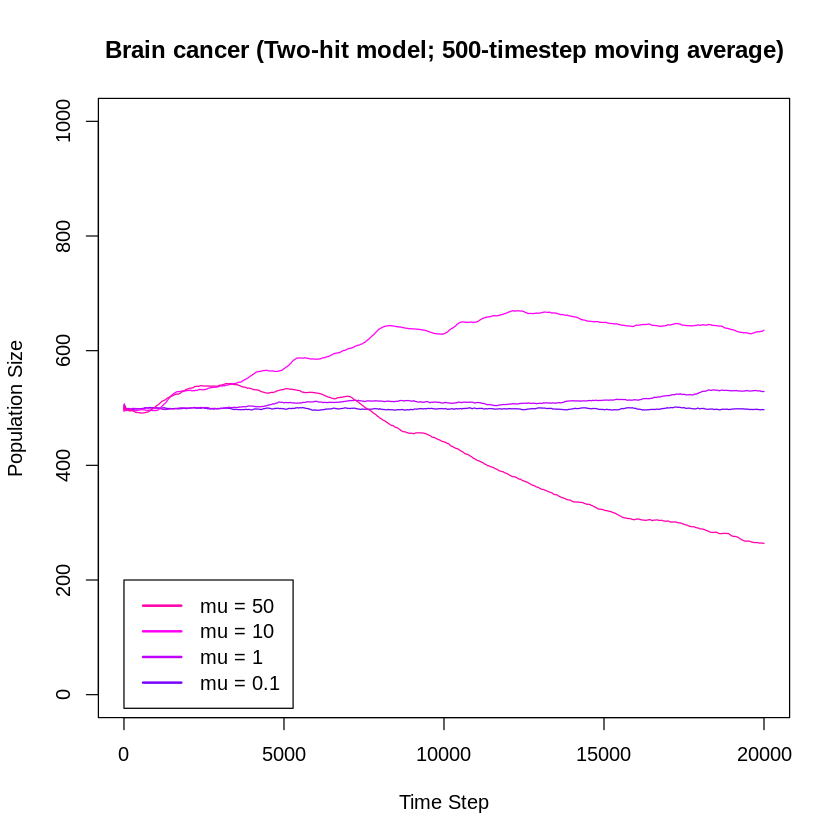

In [109]:
# plot(1:length(Ns[[1]]),Ns[[1]],type='l',xlab='Timestep',ylab='Population Size',ylim=c(0,200),col=cols[1*40])
# for (i in 2:5) {lines(1:length(Ns[[i]]),Ns[[i]],type='l',xlab='Timestep',ylab='Population Size',ylim=c(0,200),col=cols[i*40])}

plot(1:length(Ns[1,]),movavg(Ns[1,],500,'s'),type='l',main='Brain cancer (Two-hit model; 500-timestep moving average)',xlab='Time Step',ylab='Population Size',ylim=c(0,1000),col=cols[1*40])
for (i in 2:4) {lines(1:length(Ns[i,]),movavg(Ns[i,],500,'s'),type='l',xlab='Time Step',ylab='Population Size',ylim=c(0,200),col=cols[i*40])}
legend(0,200,legend=c("mu = 50","mu = 10","mu = 1","mu = 0.1"),lty=1,lwd=2,col = cols[c(160,120,80,40)])

mu is the L1 insertion rate per cell cycle (unique to each cell; proportional to birth rate)

In [5]:
dataDir <- '~/jackgl/test_brain_genetrack/'
Ns <- array(0,dim=c(4,2e4))
mui <- 4
for (i in 1:4) {
    tmp <- array(0,dim=c(5,2e4))
    for (j in 1:5) {
        load(paste0(dataDir,flst[((i-1)*20)+(5*(mui-1))+(j-1)+1]))
#         print(flst[((i-1)*20)+(5*(mui-1))+(j-1)+1])
#         print(head(N))
        N[N==0] <- NA
        tmp[j,] <- N
    }
    Ns[i,] <- apply(tmp,2,median)
}


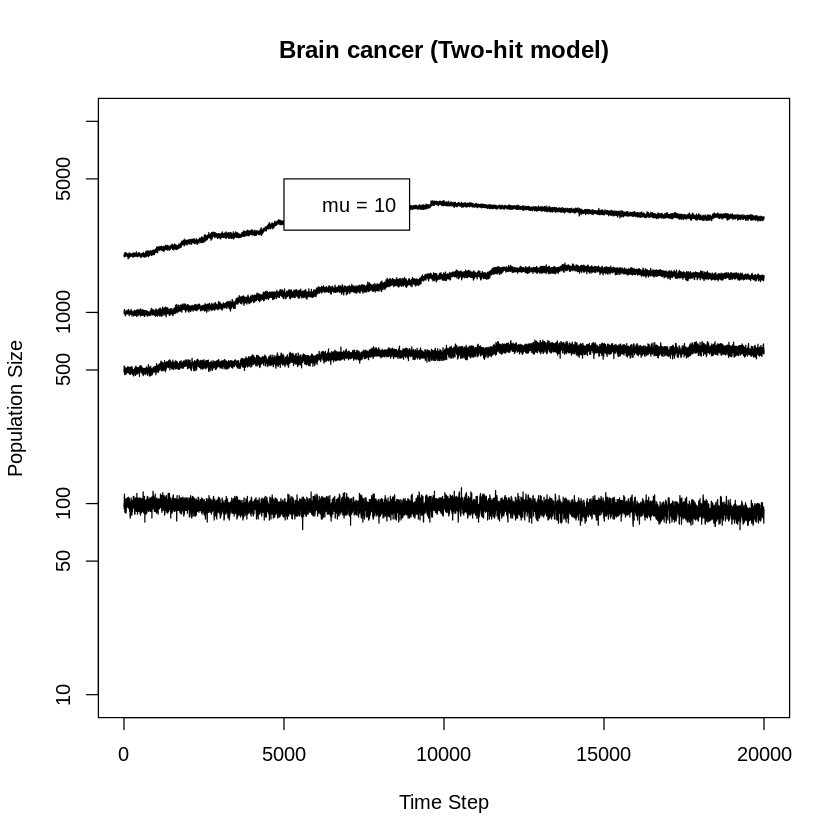

In [4]:
plot(1:length(Ns[1,]),Ns[1,],type='l',main='Brain cancer (Two-hit model)',xlab='Time Step',ylab='Population Size',ylim=c(10,1e4),log='y')
for (i in 2:4) {lines(1:length(Ns[i,]),Ns[i,],type='l',xlab='Time Step',ylab='Population Size')}
legend(5000,5000,legend=c("mu = 10"),lty=0)

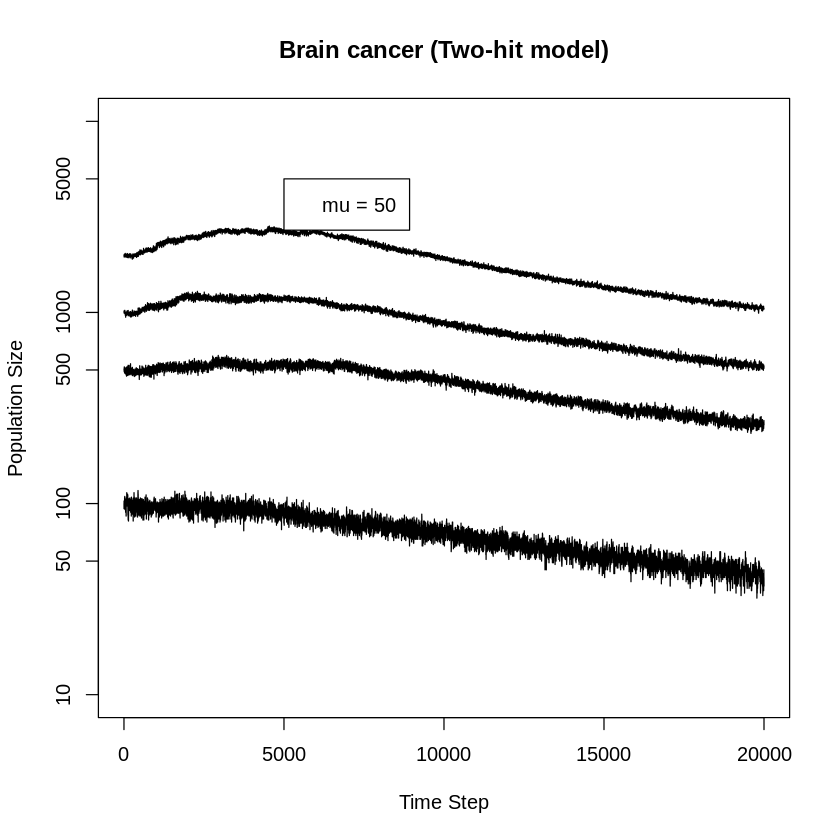

In [6]:
plot(1:length(Ns[1,]),Ns[1,],type='l',main='Brain cancer (Two-hit model)',xlab='Time Step',ylab='Population Size',ylim=c(10,1e4),log='y')
for (i in 2:4) {lines(1:length(Ns[i,]),Ns[i,],type='l',xlab='Time Step',ylab='Population Size')}
legend(5000,5000,legend=c("mu = 50"),lty=0)

## Heat maps

In [7]:
dataDir <- '~/jackgl/test_brain_genetrack/'
flst <- naturalsort(list.files(dataDir))
res <- matrix(NA,nrow=4,ncol=4)
simc <- 1
for (n0 in 1:4) {
    for (mu in 1:4) {
        tmp <- array(0,dim=c(5,1))
        for (k in 1:5) {
            load(paste0(dataDir,flst[simc]))
            #N <- movavg(N,500,'s')
            if (max(N)>=3*N[1]) {tmp[k] <- max(N)/N[1]}
            else {tmp[k] <- tail(N,n=1)/N[1]}
            simc <- simc+1
        }
        res[n0,mu] <- median(tmp)
        
    }
}


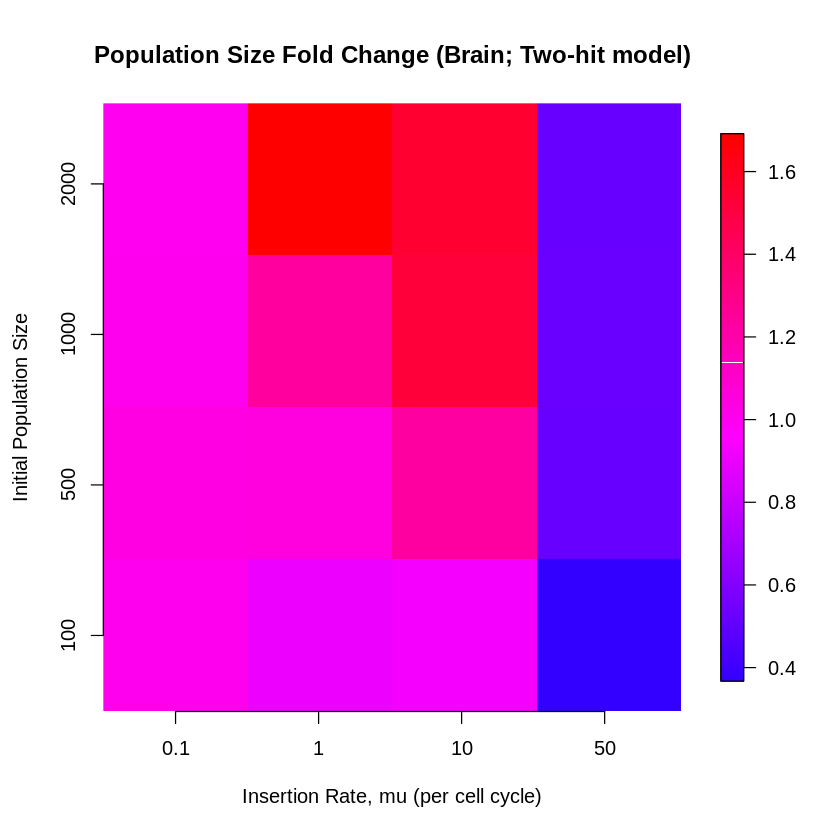

In [8]:
image.plot(t(res),axes=F,col=cols)
title(main="Population Size Fold Change (Brain; Two-hit model)",xlab='Insertion Rate, mu (per cell cycle)',ylab='Initial Population Size');
axis(1, at=seq(0,1,0.33), labels=c(1e-1,1e0,1e1,5e1)); 
axis(2, at=seq(0,1,0.33), labels=c(1e2,5e2,1e3,2e3)); 

In [9]:
dataDir <- '~/jackgl/test_brain_genetrack/'
flst <- naturalsort(list.files(dataDir))
res <- matrix(NA,nrow=4,ncol=4)
simc <- 1
for (n0 in 1:4) {
    for (mu in 1:4) {
        tmp <- array(0,dim=c(5,1))
        for (k in 1:5) {
            load(paste0(dataDir,flst[simc]))
            tmp[k] <- Pop$nld[1]
            simc <- simc+1
        }
        res[n0,mu] <- median(tmp)
        
    }
}

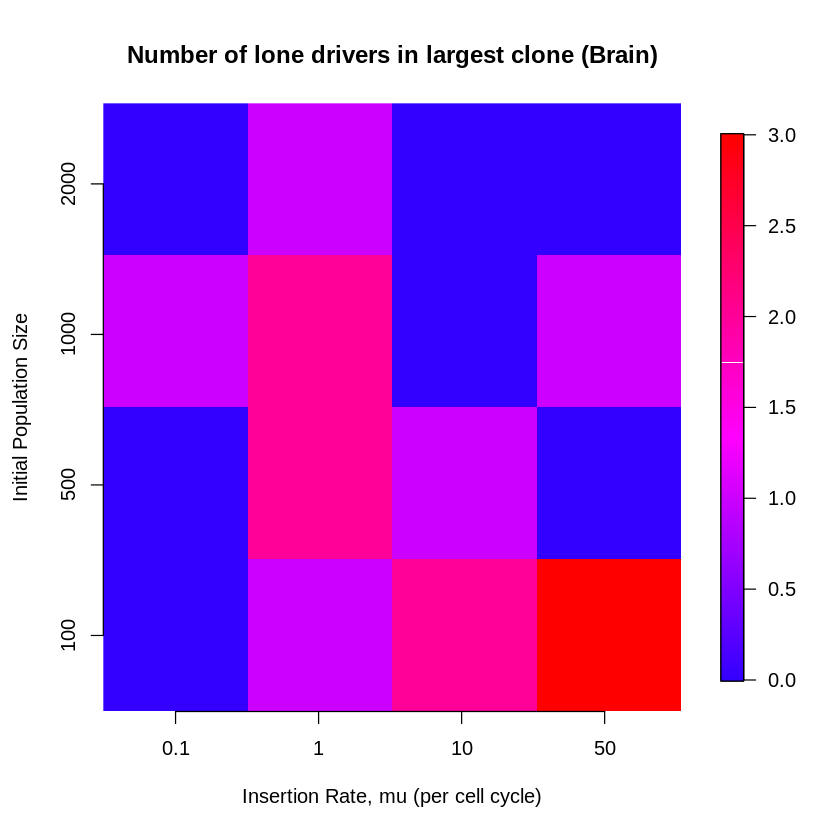

In [10]:
image.plot(t(res),axes=F,col=cols)
title(main="Number of lone drivers in largest clone (Brain)",xlab='Insertion Rate, mu (per cell cycle)',ylab='Initial Population Size');
axis(1, at=seq(0,1,0.33), labels=c(1e-1,1e0,1e1,5e1)); 
axis(2, at=seq(0,1,0.33), labels=c(1e2,5e2,1e3,2e3)); 

In [11]:
dataDir <- '~/jackgl/test_brain_genetrack/'
flst <- naturalsort(list.files(dataDir))
res <- matrix(NA,nrow=4,ncol=4)
simc <- 1
for (n0 in 1:4) {
    for (mu in 1:4) {
        tmp <- array(0,dim=c(5,1))
        for (k in 1:5) {
            load(paste0(dataDir,flst[simc]))
            tmp[k] <- Pop$npd[1]
            simc <- simc+1
        }
        res[n0,mu] <- median(tmp)
        
    }
}

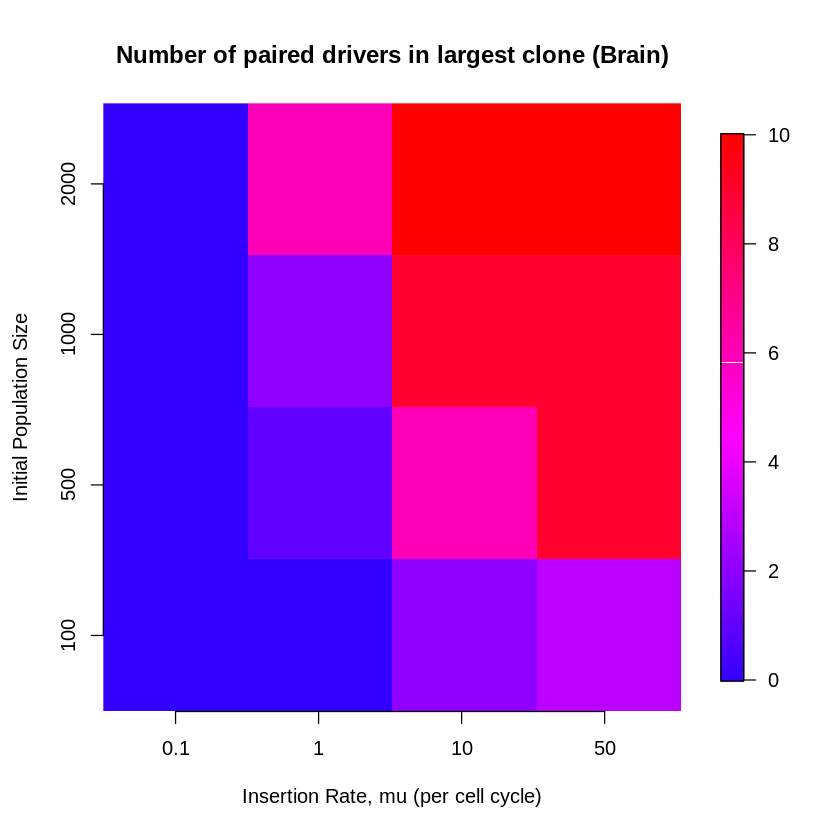

In [12]:
image.plot(t(res),axes=F,col=cols)
title(main="Number of paired drivers in largest clone (Brain)",xlab='Insertion Rate, mu (per cell cycle)',ylab='Initial Population Size');
axis(1, at=seq(0,1,0.33), labels=c(1e-1,1e0,1e1,5e1)); 
axis(2, at=seq(0,1,0.33), labels=c(1e2,5e2,1e3,2e3)); 

In [13]:
dataDir <- '~/jackgl/test_brain_genetrack/'
flst <- naturalsort(list.files(dataDir))
res <- matrix(NA,nrow=4,ncol=4)
simc <- 1
for (n0 in 1:4) {
    for (mu in 1:4) {
        tmp <- array(0,dim=c(5,1))
        for (k in 1:5) {
            load(paste0(dataDir,flst[simc]))
            tmp[k] <- Pop$nlp[1]
            simc <- simc+1
        }
        res[n0,mu] <- median(tmp)
        
    }
}

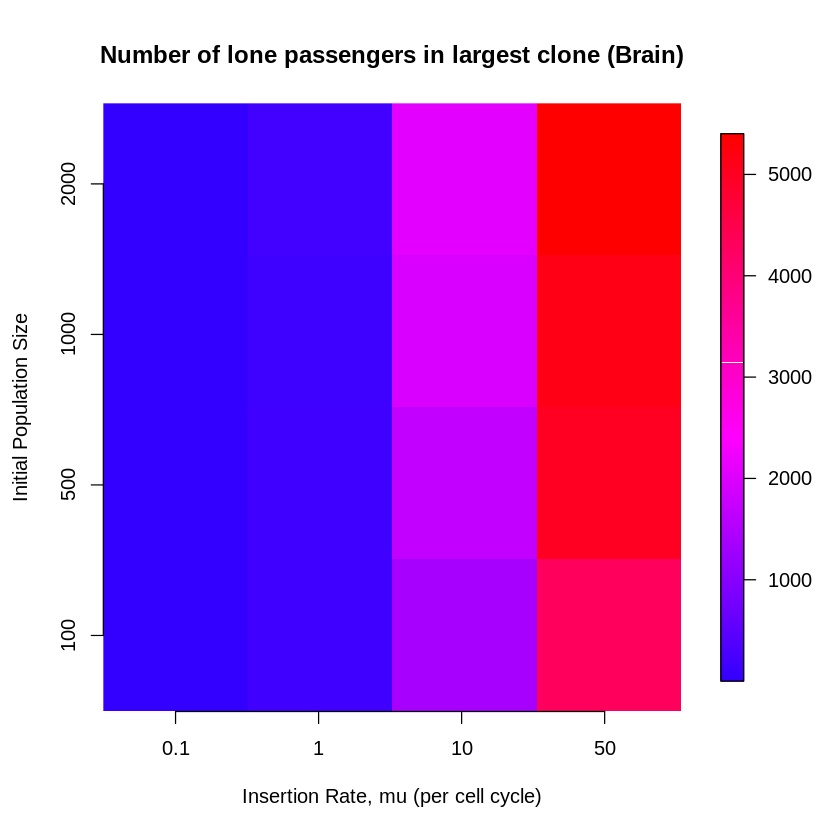

In [14]:
image.plot(t(res),axes=F,col=cols)
title(main="Number of lone passengers in largest clone (Brain)",xlab='Insertion Rate, mu (per cell cycle)',ylab='Initial Population Size');
axis(1, at=seq(0,1,0.33), labels=c(1e-1,1e0,1e1,5e1)); 
axis(2, at=seq(0,1,0.33), labels=c(1e2,5e2,1e3,2e3)); 

In [15]:
dataDir <- '~/jackgl/test_brain_genetrack/'
flst <- naturalsort(list.files(dataDir))
res <- matrix(NA,nrow=4,ncol=4)
simc <- 1
for (n0 in 1:4) {
    for (mu in 1:4) {
        tmp <- array(0,dim=c(5,1))
        for (k in 1:5) {
            load(paste0(dataDir,flst[simc]))
            tmp[k] <- Pop$npp[1]
            simc <- simc+1
        }
        res[n0,mu] <- median(tmp)
        
    }
}

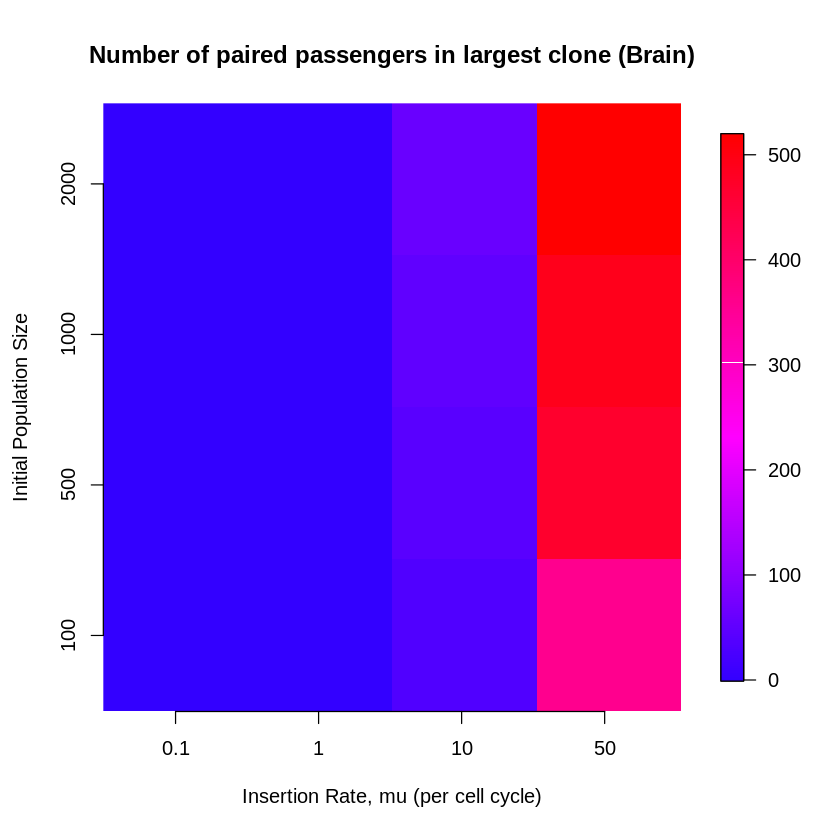

In [16]:
image.plot(t(res),axes=F,col=cols)
title(main="Number of paired passengers in largest clone (Brain)",xlab='Insertion Rate, mu (per cell cycle)',ylab='Initial Population Size');
axis(1, at=seq(0,1,0.33), labels=c(1e-1,1e0,1e1,5e1)); 
axis(2, at=seq(0,1,0.33), labels=c(1e2,5e2,1e3,2e3)); 

ncells,B,mu_i,nld,nlp,npd,npp,lgenes,pgenes
49,0.3297046,0.01038907,1,145,3,0,"RP11-126H7.4 , CTD-2240J17.3 , CTD-3222D19.12, USP34 , BCCIP , CYP17A1-AS1 , ACTR3BP6 , RP11-290F5.1 , LIFR-AS1 , LINC01505 , RPARP-AS1 , SARAF , TBX18 , MS4A4A , TTC21B , HELLPAR , TMEM255B , DNAAF2 , TBC1D3P1 , RP11-540O11.4 , NUDT21 , TMEM110-MUSTN1, SLC25A16 , ZNF891 , FAM83D , AC062016.3 , RYR3 , RP11-595B24.1 , TPST2 , CCDC92 , FAM72B , PLEKHA2 , OFD1P9Y , CSPP1 , PLEKHA7 , HDAC9 , DOCK5 , FOXO1 , NCKAP1 , RP11-584P21.2 , DRAXIN , CTA-992D9.10 , UNC80 , SPARCL1 , RP11-226E21.4 , LINC00598 , PTPRE , HMGCS1 , UBR1 , KRT24 , VAC14-AS1 , AC006129.2 , IDS , AFF3 , OIP5-AS1 , TADA2A , AC073254.1 , RP11-95D17.1 , ACAT1 , TFPI , GNPDA2 , RP11-586K12.2 , CREB5 , FRMD3 , ZNF445 , LINC01239 , DENND6A , EXTL3-AS1 , NRDE2 , MRPL43 , RPL26 , SCEL , RP1-39G22.4 , CPD , LPGAT1 , PON3 , AP003025.2 , NKAP , GCH1 , RAB6C-AS1 , SND1 , HIBCH , EXOC3-AS1 , CSMD3 , CA1 , LIMCH1 , LARP1B , ANKRD18B , RP3-461P17.10 , FIGLA , RP11-449P15.1 , ST6GALNAC3 , TAT-AS1 , RBM12 , ZMYM6 , BRWD3 , NCAPD2 , HEATR5A , DPF3 , TRAPPC5 , CTD-2168K21.1 , HNRNPH1 , RP11-278L15.3 , FILIP1 , FAT1 , LRRIQ3 , SGTB , RP5-998N21.4 , LINC01411 , PRMT2 , NUPR1 , NFAT5 , SAYSD1 , DNAH5 , KIAA1328 , CHD8 , PCDHA11 , RP11-723O4.6 , IWS1 , CNTRL , ELK4 , BRWD1 , DGKG , SLC48A1 , PRNCR1 , PSMD12 , CTB-129P6.7 , BUB1 , TUFMP1 , RP5-898I4.1 , IPO7P2 , ATRX , SFMBT2 , LANCL2 , FTLP6 , CFAP54 , RP5-1091N2.9 , SLC36A4 , TMEM263 , MIA3 , RP11-467L19.14, MYCT1 , RP11-465C12.1 , ERC1 , MTATP6P21 , RP11-428I12.1","TTN , PTEN , MUC16"
44,0.3299024,0.01039530,1,142,3,0,"RP11-126H7.4 , CTD-2240J17.3 , CTD-3222D19.12, USP34 , BCCIP , CYP17A1-AS1 , ACTR3BP6 , RP11-290F5.1 , LIFR-AS1 , LINC01505 , RPARP-AS1 , SARAF , TBX18 , MS4A4A , TTC21B , HELLPAR , TMEM255B , DNAAF2 , TBC1D3P1 , RP11-540O11.4 , NUDT21 , TMEM110-MUSTN1, SLC25A16 , ZNF891 , FAM83D , AC062016.3 , RYR3 , RP11-595B24.1 , TPST2 , CCDC92 , FAM72B , PLEKHA2 , OFD1P9Y , CSPP1 , PLEKHA7 , HDAC9 , DOCK5 , FOXO1 , NCKAP1 , RP11-584P21.2 , DRAXIN , CTA-992D9.10 , UNC80 , SPARCL1 , RP11-226E21.4 , LINC00598 , PTPRE , HMGCS1 , UBR1 , KRT24 , VAC14-AS1 , AC006129.2 , IDS , AFF3 , OIP5-AS1 , TADA2A , AC073254.1 , RP11-95D17.1 , ACAT1 , TFPI , GNPDA2 , RP11-586K12.2 , CREB5 , FRMD3 , ZNF445 , LINC01239 , DENND6A , EXTL3-AS1 , NRDE2 , MRPL43 , RPL26 , SCEL , RP1-39G22.4 , CPD , LPGAT1 , PON3 , AP003025.2 , NKAP , GCH1 , RAB6C-AS1 , SND1 , HIBCH , EXOC3-AS1 , CSMD3 , CA1 , LIMCH1 , LARP1B , ANKRD18B , RP3-461P17.10 , FIGLA , RP11-449P15.1 , ST6GALNAC3 , TAT-AS1 , RBM12 , ZMYM6 , BRWD3 , NCAPD2 , HEATR5A , DPF3 , TRAPPC5 , CTD-2168K21.1 , HNRNPH1 , RP11-278L15.3 , FILIP1 , FAT1 , LRRIQ3 , SGTB , RP5-998N21.4 , LINC01411 , PRMT2 , NUPR1 , NFAT5 , SAYSD1 , DNAH5 , KIAA1328 , CHD8 , PCDHA11 , RP11-723O4.6 , IWS1 , CNTRL , ELK4 , BRWD1 , DGKG , SLC48A1 , PRNCR1 , PSMD12 , CTB-129P6.7 , BUB1 , TUFMP1 , RP5-898I4.1 , IPO7P2 , ATRX , SFMBT2 , LANCL2 , FTLP6 , CFAP54 , LINC00342 , ADAM9 , FNDC3A , SRSF4 , KBTBD4 , RP11-46H11.3 , ATP2B3","TTN , PTEN , MUC16"
41,0.3236926,0.01019963,0,138,3,0,"RP11-126H7.4 , CTD-2240J17.3 , CTD-3222D19.12, USP34 , BCCIP , CYP17A1-AS1 , ACTR3BP6 , RP11-290F5.1 , LIFR-AS1 , LINC01505 , RPARP-AS1 , SARAF , TBX18 , MS4A4A , TTC21B , HELLPAR , TMEM255B , DNAAF2 , TBC1D3P1 , RP11-540O11.4 , NUDT21 , TMEM110-MUSTN1, SLC25A16 , ZNF891 , FAM83D , AC062016.3 , RYR3 , RP11-595B24.1 , TPST2 , CCDC92 , FAM72B , PLEKHA2 , OFD1P9Y , CSPP1 , PLEKHA7 , HDAC9 , DOCK5 , FOXO1 , NCKAP1 , RP11-584P21.2 , DRAXIN , CTA-992D9.10 , UNC80 , SPARCL1 , RP11-226E21.4 , LINC00598 , PTPRE , HMGCS1 , UBR1 , KRT24 , VAC14-AS1 , AC006129.2 , IDS , AFF3 , OIP5-AS1 , TADA2A , AC073254.1 , RP11-95D17.1 , ACAT1 , TFPI , GNPDA2 , RP11-586K12.2 , CREB5 , FRMD3 , ZNF445 , LINC01239 , DENND6A , EXTL3-AS1 , NRDE2 , MRPL43 , RPL26 , SCEL , RP1-39G22.4 , CPD , LPGAT1 , PON3 , AP003025.2 , NKAP , GCH1 , RAB6C-AS1 , SND1 , HIBCH , EXOC3-AS1 , CSMD3 , CA1 , LIMCH1 , LARP1B , ANKRD18B , 

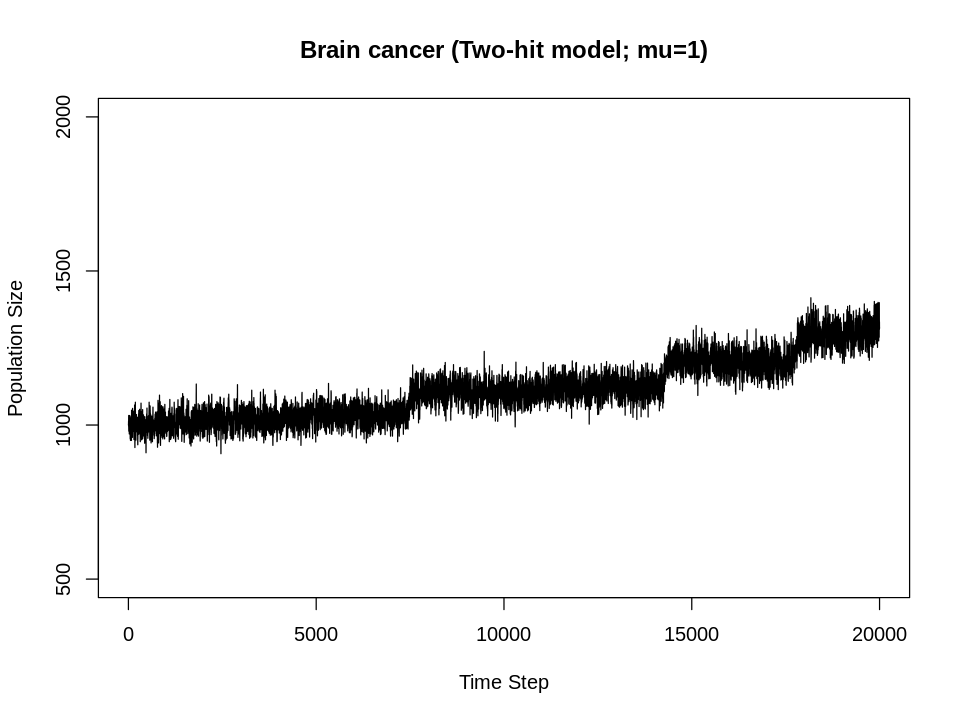

In [179]:
load('~/jackgl/test_brain_genetrack/run_n01000_50.rda')
plot(1:length(N),N,type='l',main='Brain cancer (Two-hit model; mu=1)',xlab='Time Step',ylab='Population Size',ylim=c(500,2e3))
head(Pop)
options(repr.plot.width=8, repr.plot.height=6)

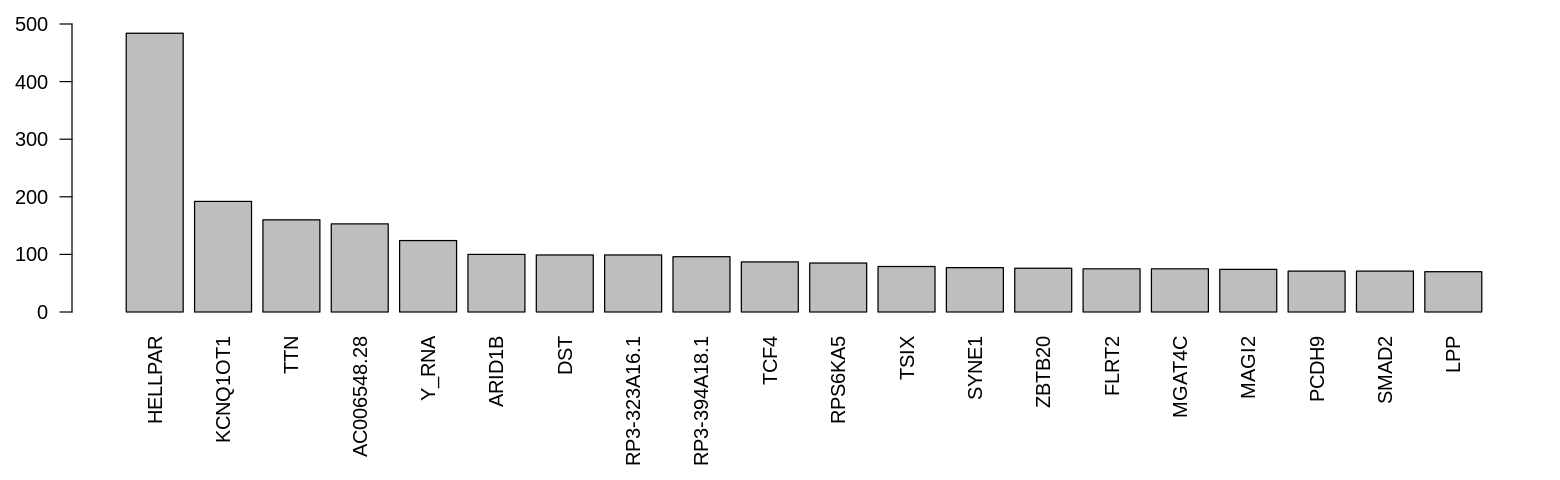

In [181]:
tmp <- table(genes)
tmp <- sort(tmp,decreasing=TRUE)
par(mar = c(7,3,1,1))
barplot(tmp[1:20],las=2,ylim=c(0,500))
options(repr.plot.width=13, repr.plot.height=4)
